I risultati che abbiamo ottenuto, dopo aver sperimentato con i 3 parametri ($N_{epoch}$, $\sigma$, $N_{train}$), sono che la migliore combinazione si ottiene se:

$N_{epoch} = 30$. 
Osservando la curva model loss (si veda più sotto) in funzione di $N_{epoch}$, si nota che a per $N_{epoch} =30$ la derivata sta tendendo a zero. Già così ci aspetteremmo che con più calcoli, e dunque richiedendo un costo computazionale più alto, non otterremmo un  miglioramento significativo. Inoltre provando, con gli altri parametri fissi a $\sigma = 0.3$, $N_{train} =500$, si nota che si ottiene un risultato peggiore per $N_{epoch} = 50$ rispetto a $30$ (nel dettaglio, si ha $m_{50} = 2.02, b_{50} = 0.97, m_{30} = 2.0, b_{30} = 0.97$). Questo non può essere dovuto all'overfitting, perchè la rete neurale è composta da un solo neurone. Deve essere piuttosto dovuta alle fluttuazioni che le tecniche random di ottimizzazione e produzione dei dati comportano. 

$\sigma =0.3$
Un po' di rumore gaussiano sembra aiutare la convergenza dell'algoritmo. 

$N_{train}=500$
L'unico confronto "fair" è se la somma fra $N_{train}$ e $N_{val}$ rimane costante, pari a $550$. Abbiamo trovato che $500$ è il punto pù adatto per $N_{train}$, perchè il numero di dati per allenare l'algoritmo deve essere consistente, ma avendo introdotto del rumore gaussiano un numero troppo piccolo di $N_{val}$ potrebbe non avere come media la retta originale. 

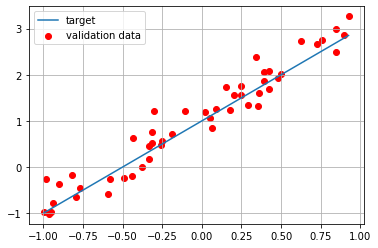

In [101]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

/home/giacomo_galliani/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.5567 - mse: 1.5567 - val_loss: 1.2028 - val_mse: 1.2028
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1437 - mse: 1.1437 - val_loss: 0.8496 - val_mse: 0.8496
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8005 - mse: 0.8005 - val_loss: 0.6273 - val_mse: 0.6273
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5760 - mse: 0.5760 - val_loss: 0.4841 - val_mse: 0.4841
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4545 - mse: 0.4545 - val_loss: 0.3851 - val_mse: 0.3851
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3691 - mse: 0.3691 - val_loss: 0.3161 - val_mse: 0.3161
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2971 - mse: 0.2971 - val_loss: 0.2660 - val_mse: 0.2660
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2497 - mse: 0.2497 - val_loss: 0.2280 - val_mse: 0.2280
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2263 - mse

In [104]:
# return weights and biases
model.get_weights()

[array([[1.8659934]], dtype=float32), array([0.9655649], dtype=float32)]

In [105]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1012 - mse: 0.1012

Test loss: 0.10562235116958618
Test accuracy: 0.10562235116958618


In [106]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0053 - mse: 0.0053

Test loss: 0.0064310552552342415
Test accuracy: 0.0064310552552342415


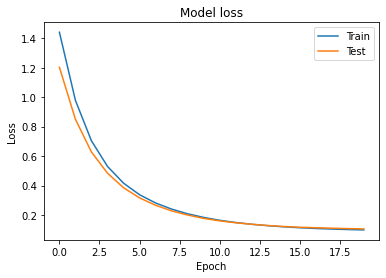

In [107]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


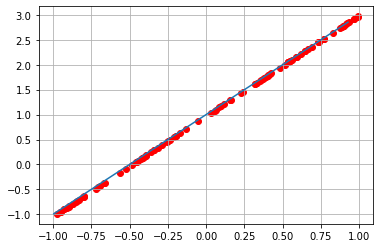

In [88]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()